Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)



Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [6]:
glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 10, 4, 3, 8, 1, 13, 5, 3, 6, 4, 11, 3, 7, …
$ Glucose                  <dbl> 85, 115, 110, 126, 99, 97, 145, 117, 88, 92, …
$ BloodPressure            <dbl> 66, 0, 92, 88, 84, 66, 82, 92, 58, 92, 60, 76…
$ SkinThickness            <dbl> 29, 0, 0, 41, 0, 15, 19, 0, 11, 0, 33, 0, 25,…
$ Insulin                  <dbl> 0, 0, 0, 235, 0, 140, 110, 0, 54, 0, 192, 0, …
$ BMI                      <dbl> 26.6, 35.3, 37.6, 39.3, 35.4, 23.2, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.134, 0.191, 0.704, 0.388, 0.487, 0.2…
$ Age                      <dbl> 31, 29, 30, 27, 50, 22, 57, 38, 22, 28, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


ERROR: Error in eval(expr, envir, enclos): object 'DiabetesPedigreeFunction' not found


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:**
I'm kind of confused here. I know that the Outcome column is binary and identifies whether someone has diabetes or not. But we don't typically use linear regression on binary outcomes, correct?

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |     Plasma glucose concentration a 2 hours in an oral glucose tolerance test        |
| BMI         |     Body mass index (weight in kg/(height in m)^2)      |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

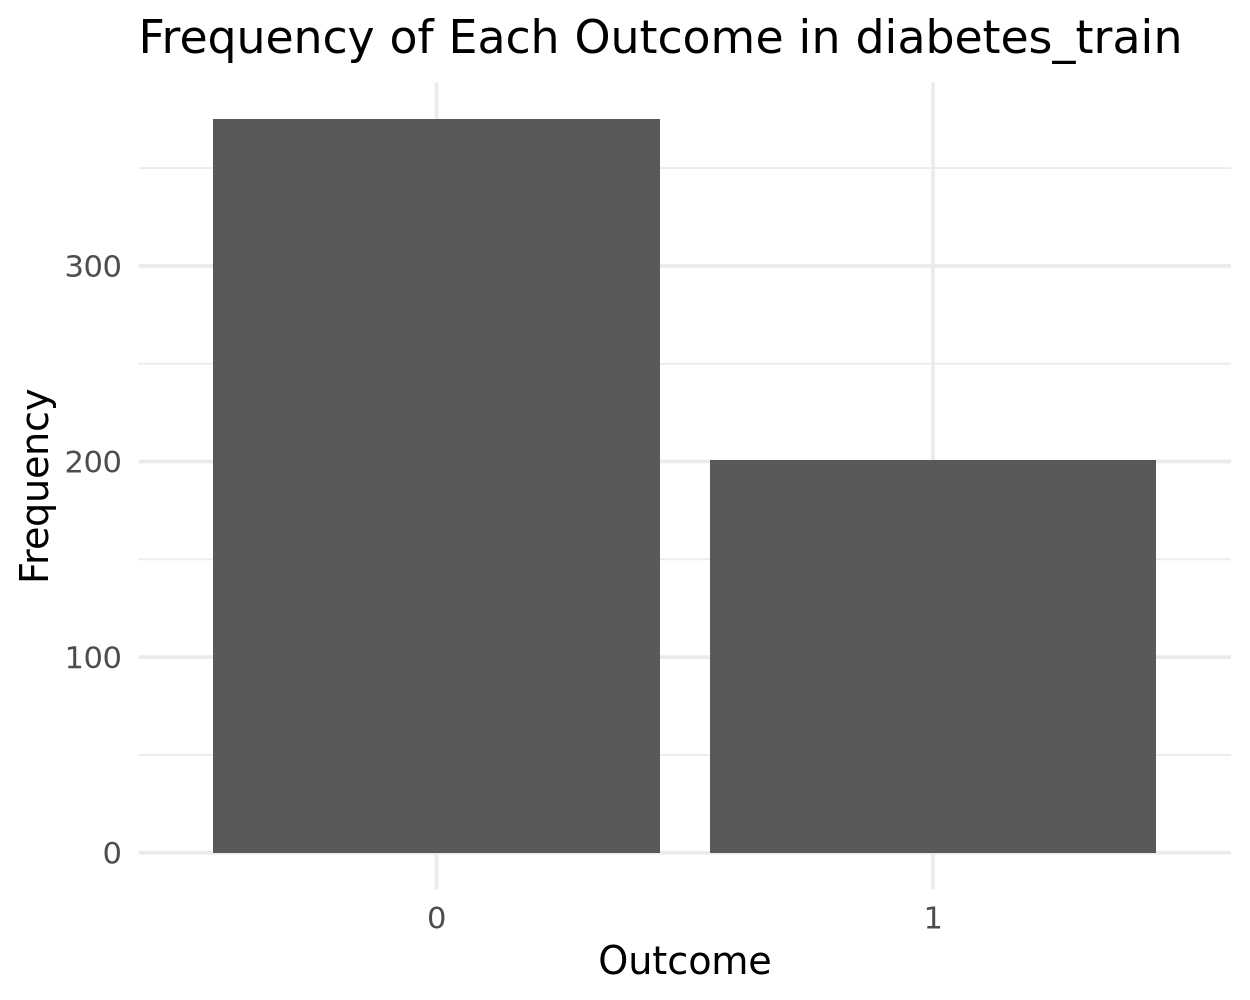

In [7]:
library(ggplot2)

ggplot(diabetes_train, aes(x = Outcome)) + 
  geom_bar() +
  labs(title = "Frequency of Each Outcome in diabetes_train", 
       x = "Outcome", 
       y = "Frequency") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

We do not have equal counts of each outcome. We have almost twice as many 0's as we do 1's.


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [8]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,115.0
0,BMI,35.3
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

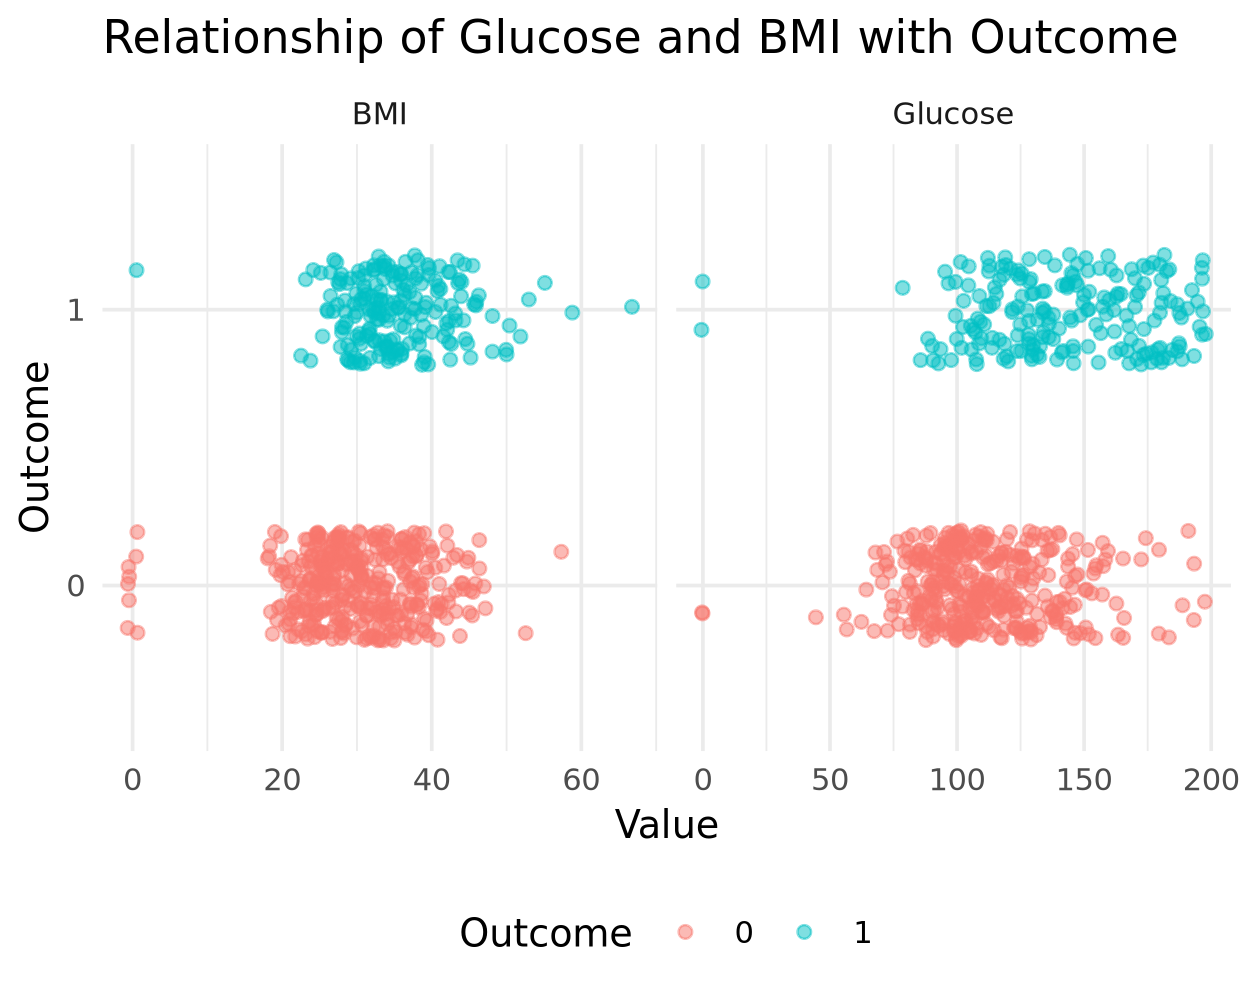

In [13]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) + 
  geom_jitter(width = 0.75, height = 0.2, alpha = 0.5) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Relationship of Glucose and BMI with Outcome", 
       x = "Value", 
       y = "Outcome") +
  theme_minimal() +
  theme(legend.position = "bottom")



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

In [ ]:
# ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) + 
#   geom_jitter(width = 0.75, height = 0.2, alpha = 0.5) +
#   facet_wrap(~name, ncol = 2) +
#   labs(title = "Relationship of Glucose and BMI with Outcome", 
#        x = "Value", 
#        y = "Outcome") +
#   theme_minimal() +
#   theme(legend.position = "bottom")

It appears that it assigns the same scale to both BMI and Glucose. Which isn't appropriate in this case - it leads to issues with visualizing BMI.



Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [25]:
mod = logistic_reg(mode = 'classification') |>
  set_engine('glm')

mod_fit = mod |>
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)

# mod_fit |> head()



$lvl
[1] "0" "1"

$spec
Logistic Regression Model Specification (classification)

Computational engine: glm 

Model fit template:
stats::glm(formula = missing_arg(), data = missing_arg(), weights = missing_arg(), 
    family = stats::binomial)

$fit

Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.34789      0.07682      0.03342  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 580.9 	AIC: 586.9

$preproc
$preproc$y_var
[1] "Outcome"


$elapsed
$elapsed$elapsed
[1] NA


$censor_probs
list()


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [26]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)


diabetes_test_wPred |> head()



.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9016194,0.09838063,1,89,66,23,94,28.1,0.167,21,0
1,0.3679887,0.63201135,0,137,40,35,168,43.1,2.288,33,1
0,0.8183419,0.18165807,5,116,74,0,0,25.6,0.201,30,0
0,0.6505282,0.34947184,10,139,80,0,0,27.1,1.441,57,0
1,0.2175694,0.78243063,1,189,60,23,846,30.1,0.398,59,1
0,0.8173710,0.18262901,7,107,74,0,0,29.6,0.254,31,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [27]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 117  36
         1   8  31

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- Adding up the total 1's under Truth, shows that we have 67 individuals with diabetes. 
- Of those 67, only 31 were predicted to have diabetes. 
- Of the 39 who were predicted to have diabetes, 8 did not have diabetes. 